1. Kütüphaneler ve Veri Hazırlığı (The Setup)

In [9]:
# Gerekli Kütüphaneler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Veriyi Yükleme
df = pd.read_csv("/Users/includeseysi/Desktop/AktüeryaAnalizVerileri/insurance.csv")

# Veriyi kontrol et
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


2. Veriyi Makine Diline Çevirme (Encoding)

In [10]:
# Kategorik Verileri Sayısala Çevirme (One-Hot Encoding)
# drop_first=True diyerek 'Dummy Variable Trap'ten kaçınıyoruz.
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Yeni veri setini görelim
print(df_encoded.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400         0           1                 0   
1   18  33.770         1   1725.55230         1           0                 0   
2   28  33.000         3   4449.46200         1           0                 0   
3   33  22.705         0  21984.47061         1           0                 1   
4   32  28.880         0   3866.85520         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0  


3. Eğitim ve Test Olarak Bölme (Train/Test Split)

In [11]:
# Hedef (y) ve Özellikler (X) ayrımı
X = df_encoded.drop('charges', axis=1) # Fiyat hariç her şey Girdi'dir
y = df_encoded['charges']              # Fiyat bizim Hedefimizdir

# %80 Eğitim, %20 Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim Verisi Sayısı: {X_train.shape[0]}")
print(f"Test Verisi Sayısı: {X_test.shape[0]}")

Eğitim Verisi Sayısı: 1070
Test Verisi Sayısı: 268


4. Modeli Kurma ve Eğitme (The Brain)

In [12]:
# Modeli Çağır
model = LinearRegression()

# Modeli Eğit (Sadece Eğitim verisiyle!)
model.fit(X_train, y_train)

print("Model Eğitimi Tamamlandı! 🚀")

Model Eğitimi Tamamlandı! 🚀


5. Tahmin ve Başarı Puanı (The Verdict)

In [13]:
# Test setindeki verileri tahmin et
y_pred = model.predict(X_test)

# Başarı Skorunu Hesapla (R-Squared)
r2 = r2_score(y_test, y_pred)

print(f"Modelin Doğruluk Skoru (R^2): {r2:.2f}")
# Çıkan sonucu bana söyle, ona göre yorumlayalım! Muhtemelen 0.75-0.78 arası çıkacak.

Modelin Doğruluk Skoru (R^2): 0.78


6. Görselleştirme 

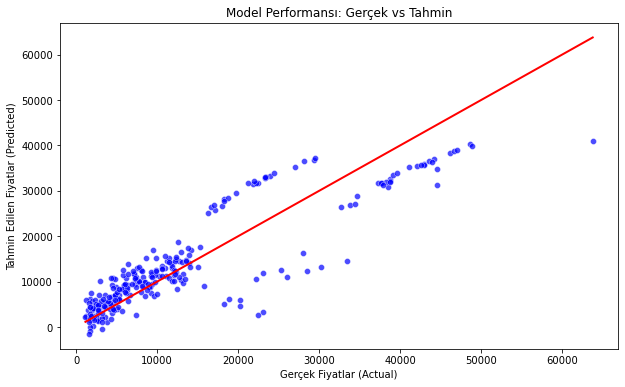

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2) # İdeal Doğru
plt.xlabel("Gerçek Fiyatlar (Actual)")
plt.ylabel("Tahmin Edilen Fiyatlar (Predicted)")
plt.title("Model Performansı: Gerçek vs Tahmin")
plt.show()

In [15]:
# Grafiği bilgisayarına kaydet
plt.savefig('insurance_prediction_graph.png', dpi=300) 
print("Grafik başarıyla kaydedildi!")

Grafik başarıyla kaydedildi!


<Figure size 432x288 with 0 Axes>